In [2]:
import pandas as pd
import numpy as np
import os
import requests

# http://z.ynet.co.il/short/content/2015/elections_map2015/

In [4]:
df = pd.read_csv(os.path.join('data', 'expc.csv'), encoding='iso8859_8')
df.head()

,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,דעם,ום,...,צק,ץ,ץז,ץי,ק,קי,קן,קף,ר,שס
0,שחר,7,516,371,0,371,17,2,0,0,...,0,0,0,0,0,0,0,0,0,33
1,תירוש,10,333,237,2,235,4,3,0,0,...,0,0,0,0,0,0,0,0,0,73
2,"ניר ח""ן",11,403,289,1,288,21,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,חצבה,13,502,403,0,403,44,2,0,0,...,0,0,0,0,3,0,0,0,0,2
4,נועם,15,302,217,2,215,1,4,0,0,...,0,0,0,0,0,0,0,0,0,25


In [118]:
df.shape

(1211, 54)

In [17]:
df['voting_percentage'] = df[r'מצביעים'] / df[r'בזב']
df['no_valid_voting_percentage'] = df[r'פסולים'] / df[r'מצביעים']
df.head()

,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,דעם,ום,...,ץי,ק,קי,קן,קף,ר,שס,voting_percentage,valid_voting_percentage,no_valid_voting_percentage
0,שחר,7,516,371,0,371,17,2,0,0,...,0,0,0,0,0,0,33,0.718992,1.000000,0.000000
1,תירוש,10,333,237,2,235,4,3,0,0,...,0,0,0,0,0,0,73,0.711712,0.991561,0.008439
2,"ניר ח""ן",11,403,289,1,288,21,0,0,0,...,0,0,0,0,0,0,2,0.717122,0.996540,0.003460
3,חצבה,13,502,403,0,403,44,2,0,0,...,0,3,0,0,0,0,2,0.802789,1.000000,0.000000
4,נועם,15,302,217,2,215,1,4,0,0,...,0,0,0,0,0,0,25,0.718543,0.990783,0.009217


In [87]:
def get_city_polygon(city_name):
    full_city_name =  '{}+ישראל'.format(city_name)
    r = requests.get(r'https://nominatim.openstreetmap.org/search.php?q={}&polygon_geojson=1&format=json'.format(full_city_name))
    try:
        return r.json()
    except Exception as e:
        return e

In [111]:
df['polygon_geojson'] = df['שם ישוב'].apply(get_city_polygon)

In [112]:
df.head()

,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,דעם,ום,...,קי,קן,קף,ר,שס,voting_percentage,valid_voting_percentage,no_valid_voting_percentage,geojson_coordinates,polygon_geojson
0,שחר,7,516,371,0,371,17,2,0,0,...,0,0,0,0,33,0.718992,1.000000,0.000000,"שחר, ישראל","[{'place_id': 95431595, 'licence': 'Data © Ope..."
1,תירוש,10,333,237,2,235,4,3,0,0,...,0,0,0,0,73,0.711712,0.991561,0.008439,"תירוש, ישראל","[{'place_id': 93665445, 'licence': 'Data © Ope..."
2,"ניר ח""ן",11,403,289,1,288,21,0,0,0,...,0,0,0,0,2,0.717122,0.996540,0.003460,"ניר ח""ן, ישראל","[{'place_id': 95792413, 'licence': 'Data © Ope..."
3,חצבה,13,502,403,0,403,44,2,0,0,...,0,0,0,0,2,0.802789,1.000000,0.000000,"חצבה, ישראל","[{'place_id': 90845692, 'licence': 'Data © Ope..."
4,נועם,15,302,217,2,215,1,4,0,0,...,0,0,0,0,25,0.718543,0.990783,0.009217,"נועם, ישראל","[{'place_id': 96136920, 'licence': 'Data © Ope..."


In [117]:
df[~df['polygon_geojson'].astype(str).str.contains(r'place_id')]

,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,דעם,ום,...,קי,קן,קף,ר,שס,voting_percentage,valid_voting_percentage,no_valid_voting_percentage,geojson_coordinates,polygon_geojson
57,גיניגר,92,555,394,0,394,112,0,0,0,...,0,0,0,0,0,0.709910,1.000000,0.000000,"גיניגר, ישראל",[]
138,"כפר הרא""ה",217,717,588,0,588,9,3,0,0,...,0,0,0,0,9,0.820084,1.000000,0.000000,"כפר הרא""ה, ישראל",[]
160,ביתן אהרן,252,180,137,1,136,14,2,0,0,...,0,0,0,0,0,0.761111,0.992701,0.007299,"ביתן אהרן, ישראל",[]
164,ניר דוד (תל עמל),256,610,481,2,479,89,1,0,0,...,0,0,0,0,0,0.788525,0.995842,0.004158,"ניר דוד (תל עמל), ישראל",[]
181,פקיעין חדשה,281,317,250,1,249,6,3,0,0,...,1,0,0,0,65,0.788644,0.996000,0.004000,"פקיעין חדשה, ישראל",[]
240,בית זיד,353,113,70,0,70,16,0,0,0,...,0,0,0,1,0,0.619469,1.000000,0.000000,"בית זיד, ישראל",[]
345,ג'ש (גוש חלב),487,2438,1153,18,1135,24,0,113,501,...,2,0,1,0,39,0.472929,0.984389,0.015611,"ג'ש (גוש חלב), ישראל",[]
347,דייר אל-אסד,490,8056,5919,33,5886,266,2,1969,2661,...,0,1,2,11,531,0.734732,0.994425,0.005575,"דייר אל-אסד, ישראל",[]
351,טייבה (בעמק),497,1193,472,6,466,83,0,119,142,...,1,0,0,6,13,0.395641,0.987288,0.012712,"טייבה (בעמק), ישראל",[]
368,עין נקובא,521,1617,726,48,678,30,1,37,229,...,0,2,4,8,4,0.448980,0.933884,0.066116,"עין נקובא, ישראל",[]


In [207]:
valid_polys_df = df[df['polygon_geojson'].astype(str).str.contains(r'place_id')]

# polygon types

In [209]:
valid_polys_df['polygon_type'] = valid_polys_df['polygon_geojson'].apply(lambda a: a[0]['geojson']['type'])
valid_polys_df['polygon_type'].value_counts()

/home/ariel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Polygon         908
Point           119
LineString       78
MultiPolygon     11
Name: polygon_type, dtype: int64

In [284]:
# valid_polys_df = valid_polys_df[valid_polys_df['polygon_type'].isin(['MultiPolygon', 'Polygon'])]
valid_polys_df = valid_polys_df[valid_polys_df['polygon_type'] =='Polygon']

In [334]:
from shapely.geometry import Polygon, MultiPolygon

In [299]:
def reshaper(c):
    if len(np.shape(c)) == 3 or len(np.shape(c)) == 1:
        return c[0]
    return c

In [301]:
data = {}
for i, row in valid_polys_df.iterrows():
    city_name = row['שם ישוב']
    data[city_name] = {}
    data[city_name]['voting_percentage'] = row['voting_percentage']
    data[city_name]['no_valid_voting_percentage'] = row['no_valid_voting_percentage']
    
    geojson = row['polygon_geojson'][0]['geojson']
    
#     if geojson['type'] == 'MultiPolygon':
#         print(i, city_name)
#         x = MultiPolygon(geojson['coordinates'])
            
#     elif geojson['type'] == 'Polygon':
#     print(i, city_name)
    g = reshaper(geojson['coordinates'])
    x = Polygon(g)
        
    data[city_name]['geometry'] = x

In [205]:
from matplotlib import pyplot as plt
from descartes import PolygonPatch

In [102]:
# get Israel polygon's geojson
israel_geojson = requests.get(r'https://nominatim.openstreetmap.org/search.php?q=ישראל&polygon_geojson=1&format=json').json()
ymin, ymax, xmin, xmax = israel_geojson[0]['boundingbox']
# il_coordinates = np.array(israel_geojson[0]['geojson']['coordinates'][0])
# xmin, xmax = il_coordinates[:, 0].min(), il_coordinates[:, 0].max()
# ymin, ymax = il_coordinates[:, 1].min(), il_coordinates[:, 1].max()

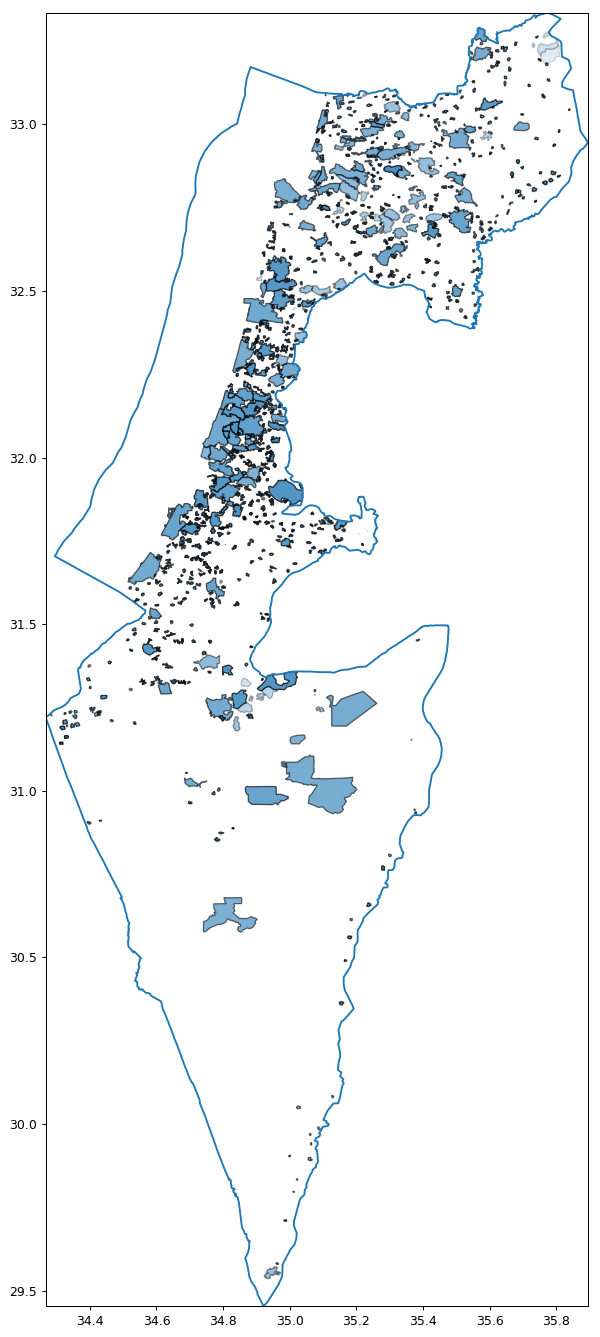

In [369]:
fig = plt.figure(1, figsize=(5,5), dpi=90)

ring_mixed = Polygon([(0, 1), (0, 2), (1, 1),
    (2, 2), (2, 0), (1, 0.5), (0, 1)])


ax = fig.add_subplot(111)
il_outline_x, il_outline_y = Polygon(il_coordinates).exterior.xy
ax.plot(il_outline_x, il_outline_y)
# ring_patch = PolygonPatch(Polygon(il_coordinates), alpha=0.1)
# ax.add_patch(ring_patch)


# Plot all the cities
for city_name in data:
    city_geometry = data[city_name]['geometry']
    ring_patch = PolygonPatch(city_geometry, ec=None, alpha=data[city_name]['voting_percentage'])
    ax.add_patch(ring_patch)

xrange = [xmin, xmax]
yrange = [ymin, ymax]
ax.set_xlim(*xrange)
# ax.set_xticks(list(range(*xrange)) + [xrange[-1]])
ax.set_ylim(*yrange)
# ax.set_yticks(list(range(*yrange)) + [yrange[-1]])
ax.set_aspect(1)
plt.subplots_adjust(right=3, top=3)

In [371]:
vs = np.array([data[city_name]['no_valid_voting_percentage'] for city_name in data])
vs.mean()

0.0042401853221468245

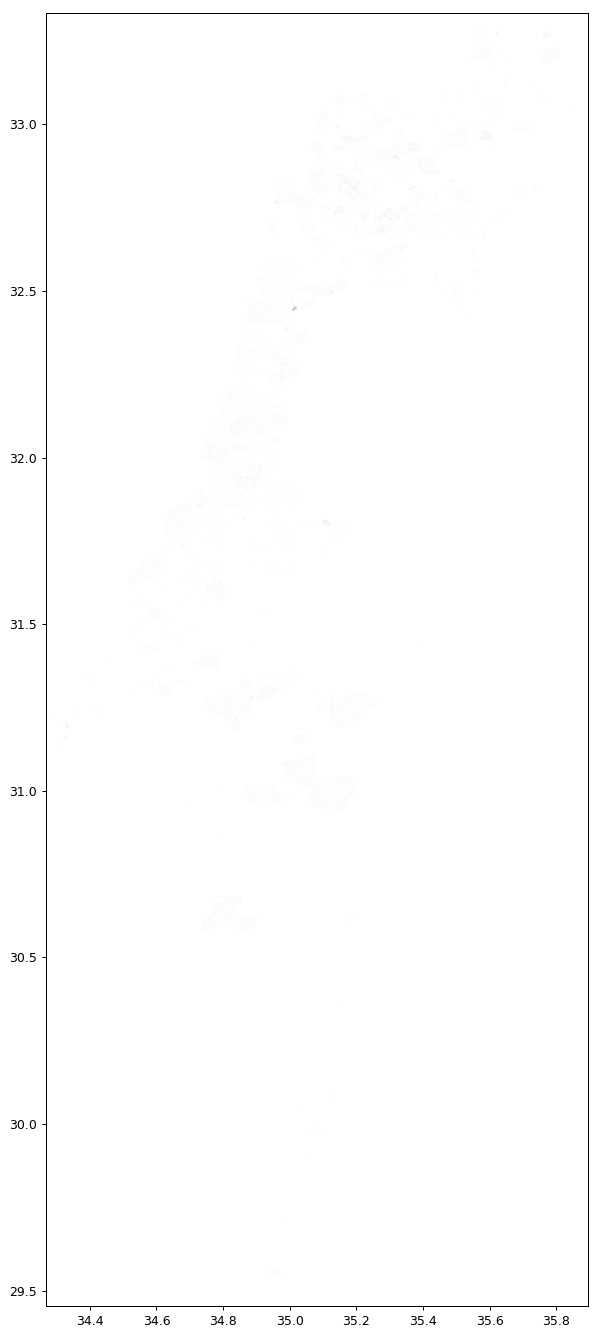

In [363]:
fig = plt.figure(1, figsize=(5,5), dpi=90)

ring_mixed = Polygon([(0, 1), (0, 2), (1, 1),
    (2, 2), (2, 0), (1, 0.5), (0, 1)])


ax = fig.add_subplot(111)
# il_outline_x, il_outline_y = Polygon(il_coordinates).exterior.xy
# ax.plot(il_outline_x, il_outline_y)
# ring_patch = PolygonPatch(Polygon(il_coordinates), alpha=0.1)
# ax.add_patch(ring_patch)


# Plot all the cities
for city_name in data:
    city_geometry = data[city_name]['geometry']
    ring_patch = PolygonPatch(city_geometry, ec=None, alpha=data[city_name]['no_valid_voting_percentage'])
    ax.add_patch(ring_patch)

xrange = [xmin, xmax]
yrange = [ymin, ymax]
ax.set_xlim(*xrange)
# ax.set_xticks(list(range(*xrange)) + [xrange[-1]])
ax.set_ylim(*yrange)
# ax.set_yticks(list(range(*yrange)) + [yrange[-1]])
ax.set_aspect(1)
plt.subplots_adjust(right=3, top=3)